# QCTO - Workplace Module

### Project Title: Vegetable prices
#### Done By: Samukelisiwe Nkosi

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The purpose of this project is to analyze and visualize the pricing trends of ten commonly consumed vegetables across different regions over a year. By studying these trends, the project aims to uncover patterns, seasonal fluctuations, and regional variations in vegetable prices. This analysis can serve as a valuable resource for policymakers, farmers, businesses, and consumers to make informed decisions related to agriculture, trade, and consumption.
* **Details:** The dataset focuses on vegetable pricing trends, a critical aspect of agricultural economics and food supply chains. Frequent price fluctuations and regional variations can significantly impact producers' incomes and consumers' affordability, making it essential to understand these dynamics.
* **Addresses:**
What are the average price trends for each vegetable throughout the year?
Are there specific months or seasons when prices peak or drop for particular vegetables?
Which vegetables show the most significant regional price differences?
How do external factors like climate, supply chain disruptions, or festivals correlate with price trends?
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Machine Learning (if applicable)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** This ensures clarity on the source, scope, and structure of the data, enabling accurate analysis and interpretation.
* **Details:** Data Source:
The dataset was sourced from the Agricultural Marketing Information Network (AgmarkNet), a government-authorized platform providing real-time market data for agricultural produce in India.


---

* **Collection Method:**
The data was compiled through:

* **APIs and Web Scraping:** Accessing and retrieving price information from AgmarkNet's database.
* **Precompiled Datasets:** Publicly available datasets downloaded from the AgmarkNet repository on kaggle.
* **Dataset Overview:**
* Size: The dataset spans a full year, recording daily or periodic prices for ten commonly consumed vegetables across multiple regions.
* Scope: Includes vegetable prices recorded over various timeframes and across diverse geographic locations.
* Columns and Data Types:
* Date: (Datetime) The date on which the prices were recorded.
* Bhindi (Ladies Finger): (Numerical) Price per kilogram in INR.
* Tomato: (Numerical) Price per kilogram in INR.
* Onion: (Numerical) Price per kilogram in INR.
* Potato: (Numerical) Price per kilogram in INR.
* Brinjal: (Numerical) Price per kilogram in INR.
* Garlic: (Numerical) Price per kilogram in INR.
* Peas: (Numerical) Price per kilogram in INR.
* Methi: (Numerical) Price per kilogram in INR.
* Green Chilli: (Numerical) Price per kilogram in INR.
* Elephant Yam (Suran): (Numerical) Price per kilogram in INR.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [11]:
# Load the data into a DataFrame
data = pd.read_csv('prices.csv')

data

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25
...,...,...,...,...,...,...,...,...,...,...,...
282,27-12-2023,45.0,16,30.0,20,70,260,40,16,40.0,25
283,28-12-2023,45.0,16,30.0,20,70,260,30,20,45.0,25
284,29-12-2023,45.0,16,30.0,22,80,260,30,18,50.0,25
285,31-12-2023,45.0,16,26.0,20,60,250,40,16,50.0,40


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [12]:
## Check for missing values
print("Missing values in the dataset:")
print(dataset.isnull().sum())

Missing values in the dataset:
Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64


In [16]:
## Remove duplicate rows
dataset_cleaned = dataset.drop_duplicates()


In [55]:
# Convert 'Price Dates' column to datetime format with correct format
dataset['Price Dates'] = pd.to_datetime(dataset['Price Dates'], format='%d-%m-%Y')

# Check the format
print(dataset['Price Dates'].head())

0   2023-01-01
1   2023-01-02
2   2023-01-03
3   2023-01-04
4   2023-01-08
Name: Price Dates, dtype: datetime64[ns]


In [56]:
# Group the data by 'Price Dates' and calculate the average price for each vegetable
price_by_date = data.groupby('Price Dates').mean()

# Check the first few rows
price_by_date.head()

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
Price Dates,,,,,,,,,,
01-01-2023,35.0,18.0,22.0,20.0,30.0,50.0,25.0,8.0,45.0,25.0
01-01-2024,45.0,16.0,9.0,18.0,50.0,260.0,40.0,15.0,60.0,25.0
01-02-2023,42.5,16.0,13.0,17.0,50.0,65.0,30.0,12.0,45.0,30.0
01-03-2023,30.0,16.0,11.0,13.0,20.0,85.0,30.0,6.0,50.0,30.0
01-06-2023,17.5,16.0,12.0,19.0,25.0,95.0,50.0,12.0,40.0,20.0


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [18]:
## Descriptive Statistics
print("Summary statistics for the dataset:")
print(data.describe())

Summary statistics for the dataset:
       Bhindi (Ladies finger)      Tomato       Onion      Potato     Brinjal  \
count              287.000000  287.000000  287.000000  287.000000  287.000000   
mean                29.444251   16.006969   20.649826   18.585366   31.655052   
std                  8.124815    0.118056   11.711204    2.726238   11.725421   
min                 17.000000   16.000000    8.000000   12.000000   14.000000   
25%                 22.000000   16.000000   12.000000   16.000000   25.000000   
50%                 27.500000   16.000000   16.000000   20.000000   30.000000   
75%                 33.000000   16.000000   25.000000   20.000000   35.000000   
max                 60.000000   18.000000   57.000000   24.000000   80.000000   

           Garlic        Peas        Methi  Green Chilli  Elephant Yam (Suran)  
count  287.000000  287.000000   287.000000    287.000000            287.000000  
mean   133.101045   66.658537    20.383275     44.122404             28.

<Figure size 1000x600 with 0 Axes>

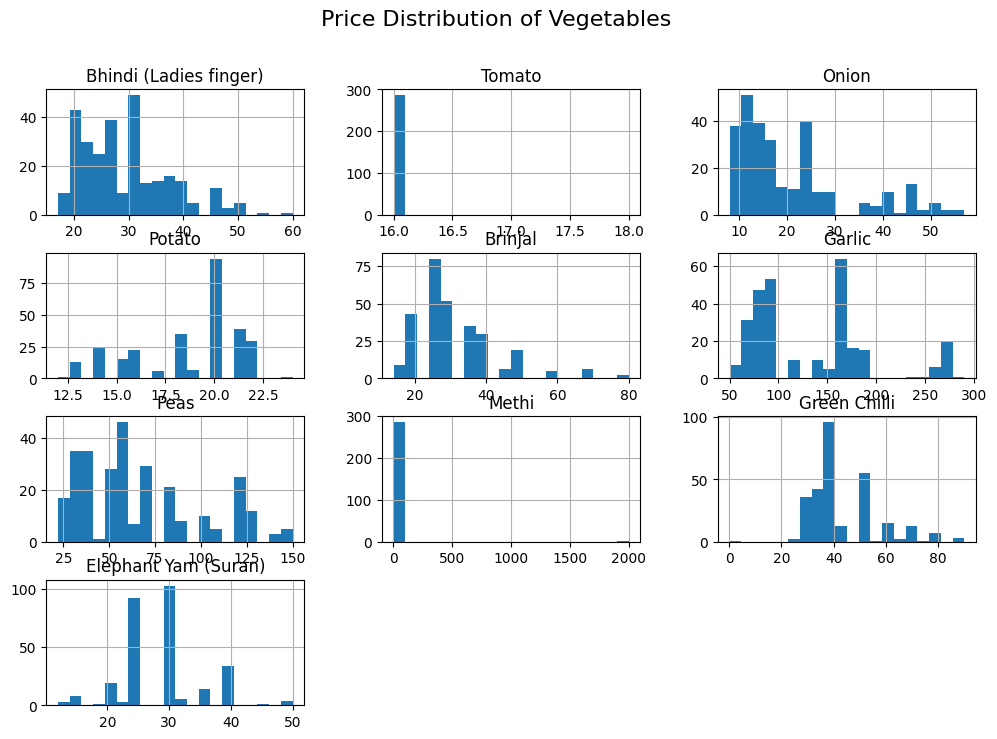

In [19]:
## Visualizing the Distribution of Prices with Histograms
numerical_columns = data.select_dtypes(include='number').columns

plt.figure(figsize=(10, 6))
data[numerical_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle('Price Distribution of Vegetables', fontsize=16)
plt.show()

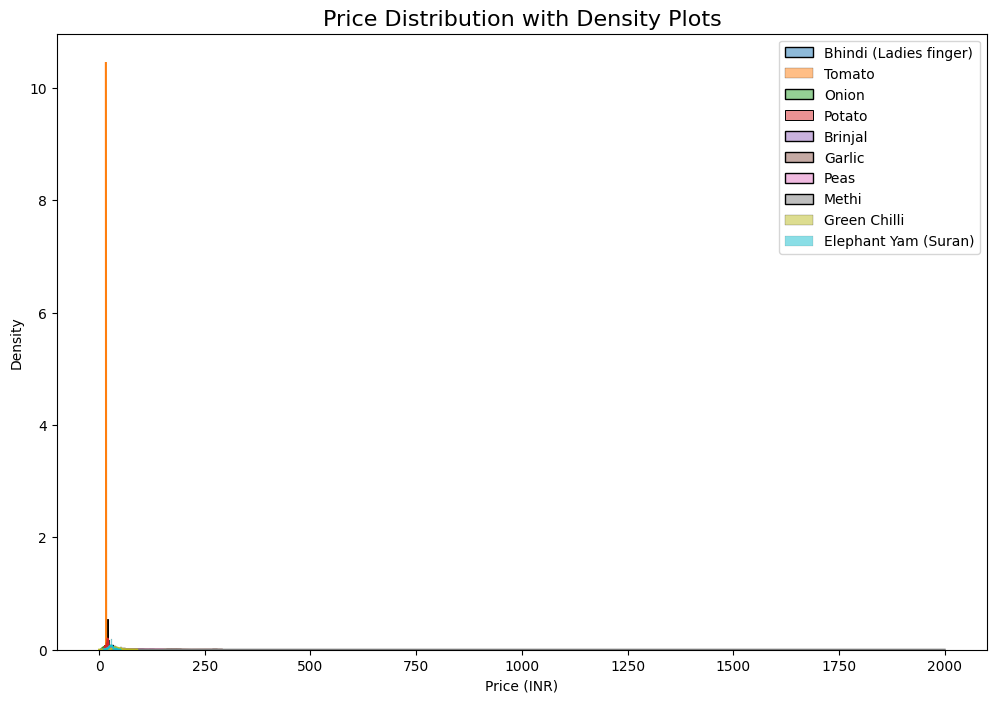

In [32]:
# Step 1: Histogram with Density Plot for each vegetable
plt.figure(figsize=(12, 8))

# Plot histograms with density for all vegetables
for vegetable in numerical_columns:
    sns.histplot(data[vegetable], kde=True, bins=20, label=vegetable, stat="density", common_norm=False)

plt.title('Price Distribution with Density Plots', fontsize=16)  
plt.xlabel('Price (INR)')
plt.ylabel('Density')
plt.legend()
plt.show()

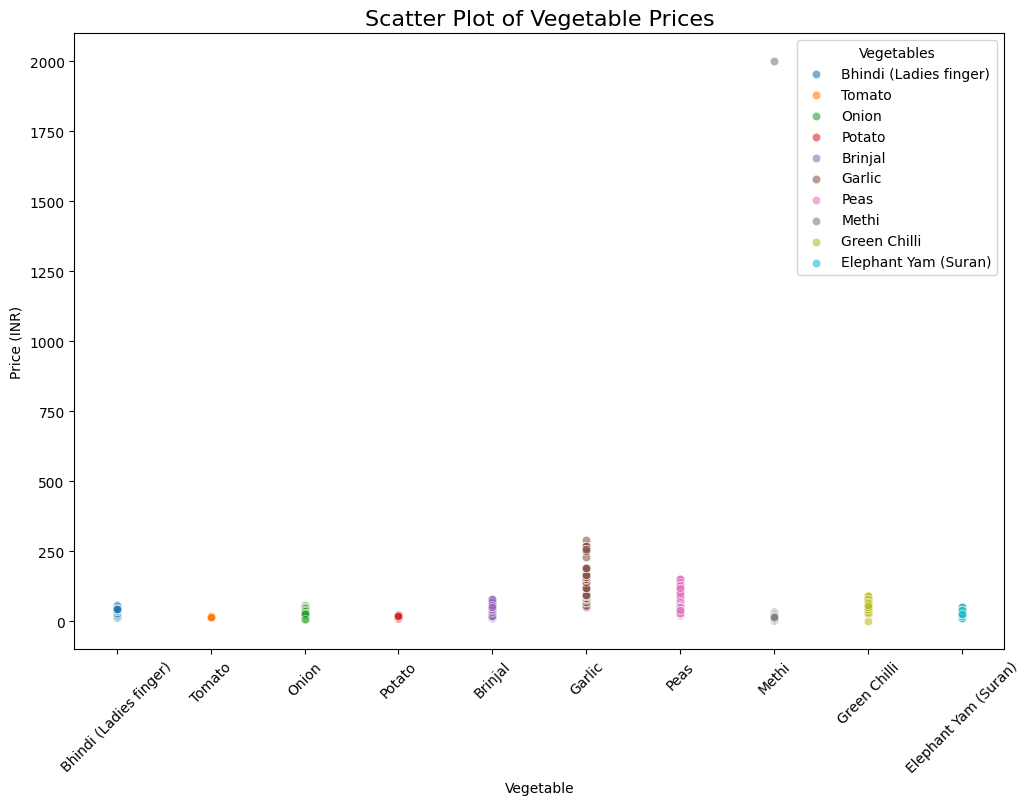

In [36]:
# Step 1: Create a combined scatter plot
plt.figure(figsize=(12, 8))

# Create scatter plot for each vegetable's prices
for vegetable in numerical_columns:
    sns.scatterplot(x=[vegetable]*len(data), y=data[vegetable], label=vegetable, alpha=0.6)

plt.title('Scatter Plot of Vegetable Prices', fontsize=16)
plt.xlabel('Vegetable')
plt.ylabel('Price (INR)')
plt.legend(title="Vegetables")
plt.xticks(rotation=45)
plt.show()

C:\Users\samuk\AppData\Local\Temp\ipykernel_17008\4040497052.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_prices.index, y=mean_prices.values, palette='viridis')


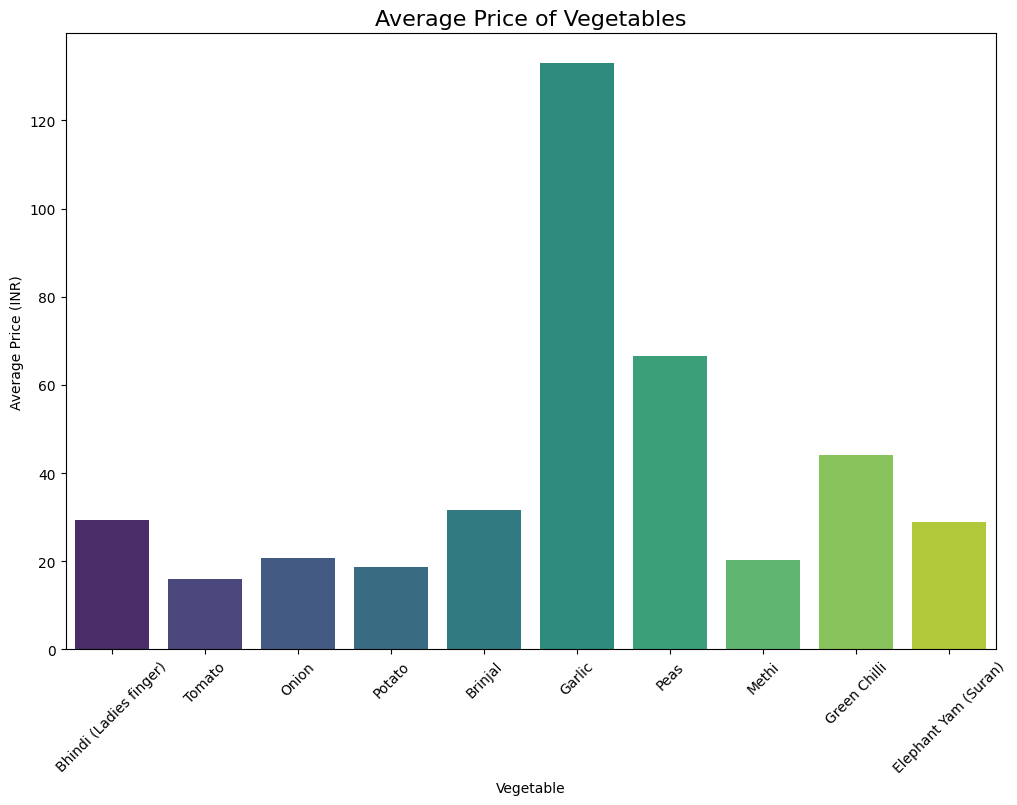

In [42]:
# Step 1: Calculate mean price for each vegetable
mean_prices = data[numerical_columns].mean()

# Step 2: Create a bar plot of the mean prices
plt.figure(figsize=(12, 8))

# Plot bar graph
sns.barplot(x=mean_prices.index, y=mean_prices.values, palette='viridis')

plt.title('Average Price of Vegetables', fontsize=16)
plt.xlabel('Vegetable')
plt.ylabel('Average Price (INR)')
plt.xticks(rotation=45)
plt.show()

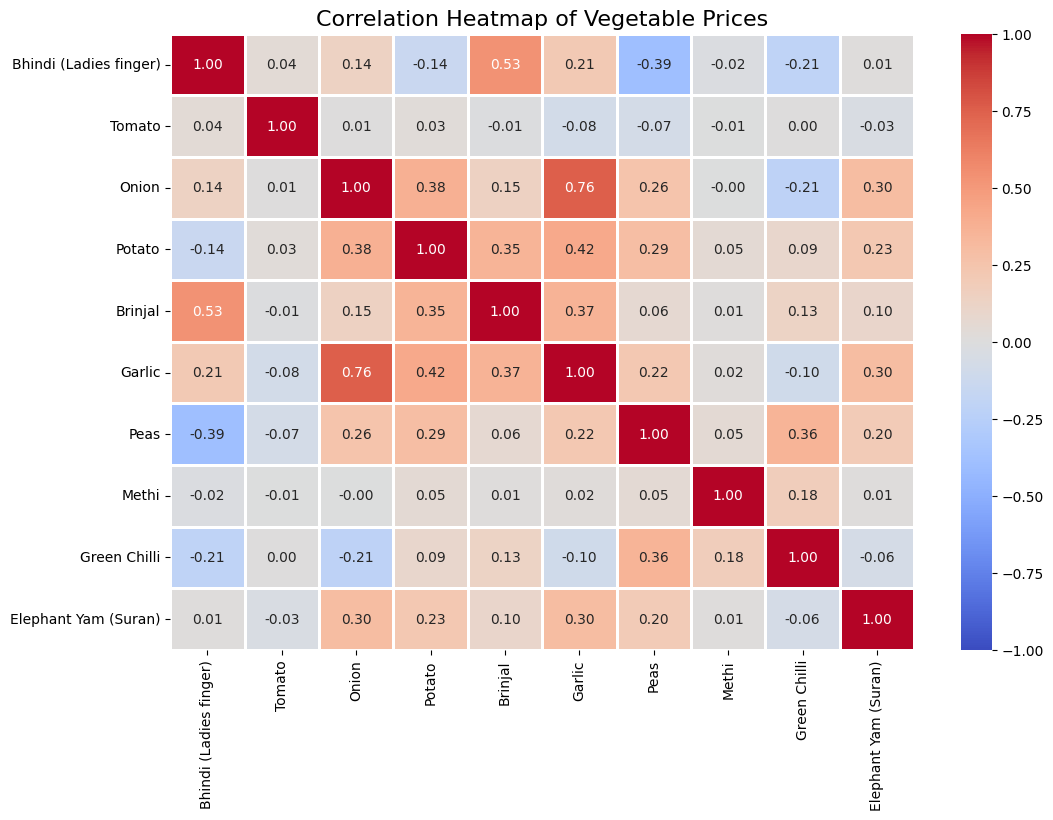

In [50]:
# Step 3: Correlation Heatmap
corr_matrix = data[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Vegetable Prices', fontsize=16)
plt.show()

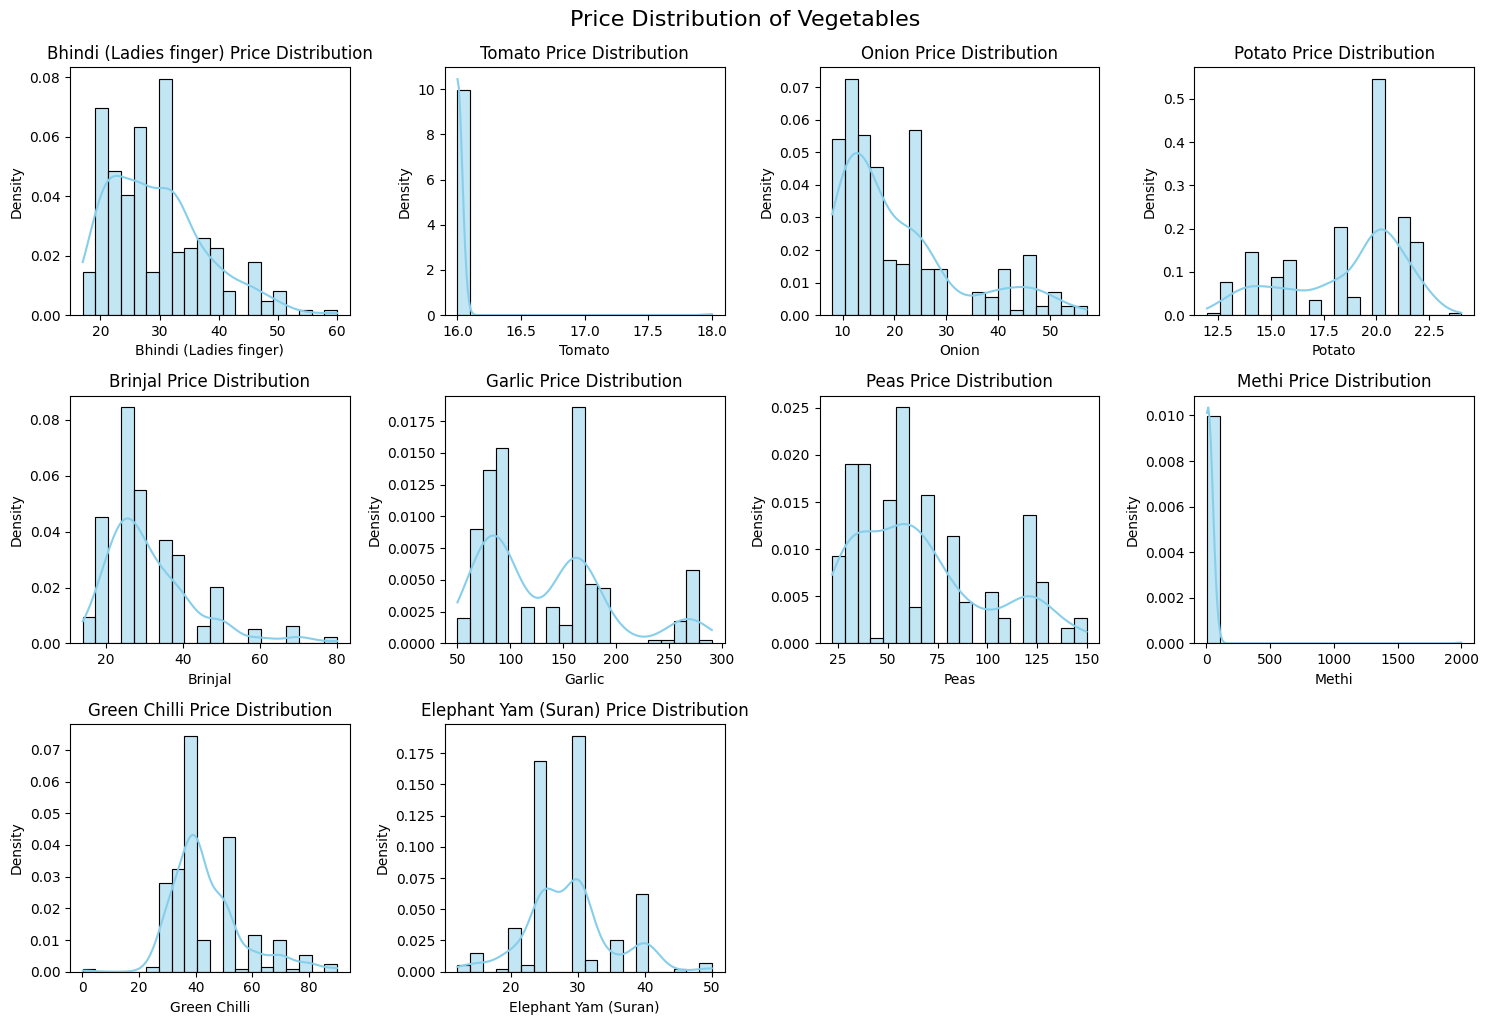

In [51]:
# Step 5: Individual Histograms for Vegetable Prices
plt.figure(figsize=(15, 10))
for i, vegetable in enumerate(numerical_columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(data[vegetable], kde=True, bins=20, color='skyblue', stat='density')
    plt.title(f'{vegetable} Price Distribution')

plt.tight_layout()
plt.suptitle('Price Distribution of Vegetables', fontsize=16, y=1.02)
plt.show()

C:\Users\samuk\AppData\Local\Temp\ipykernel_17008\4064723197.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_prices.index, y=mean_prices.values, palette='coolwarm')


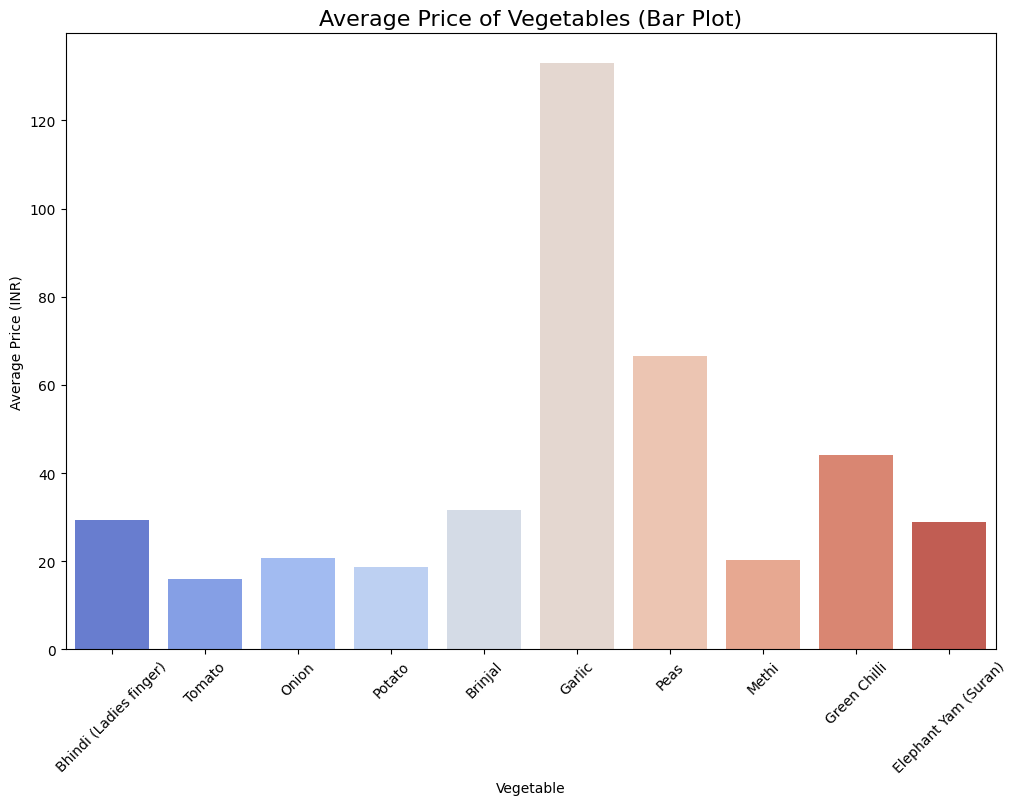

In [53]:
# Step 7: Side-by-Side Bar Plot for Price Comparison
mean_prices = data[numerical_columns].mean()

plt.figure(figsize=(12, 8))
sns.barplot(x=mean_prices.index, y=mean_prices.values, palette='coolwarm')
plt.title('Average Price of Vegetables (Bar Plot)', fontsize=16)
plt.xlabel('Vegetable')
plt.ylabel('Average Price (INR)')
plt.xticks(rotation=45)
plt.show()

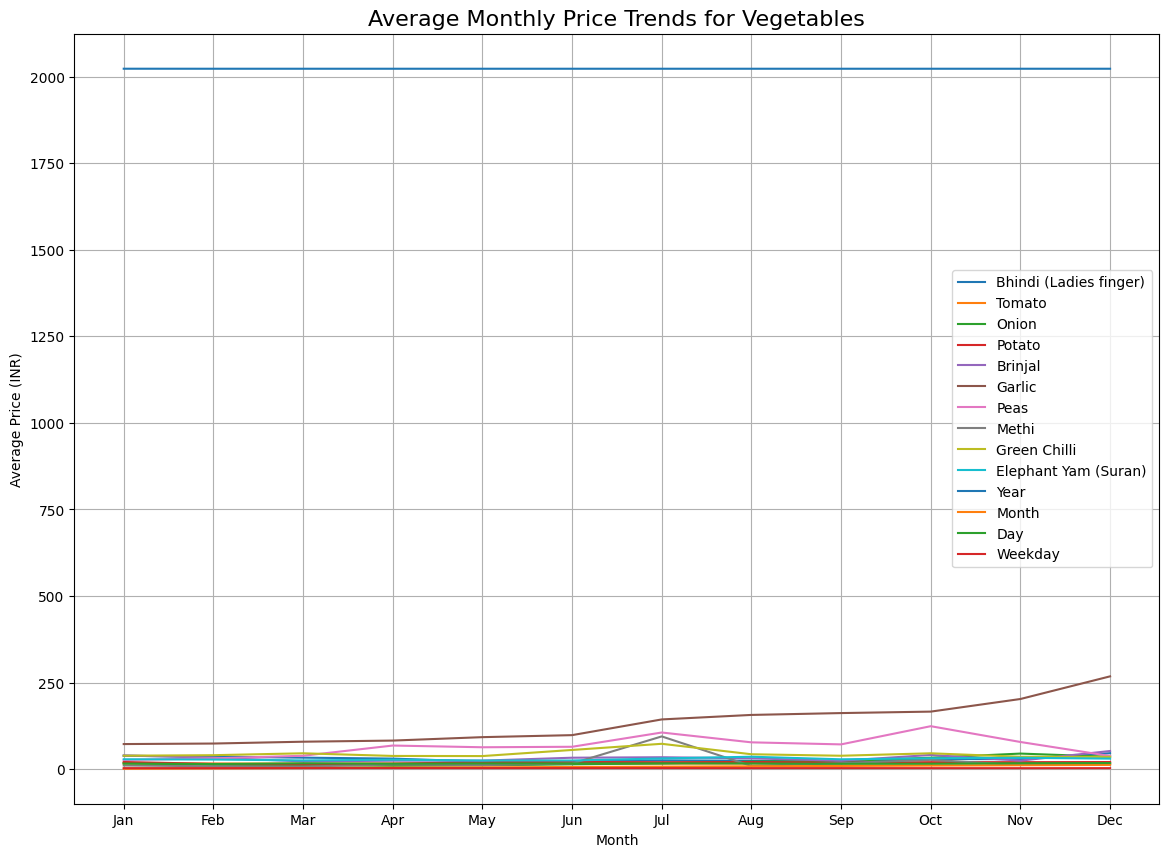

In [87]:
# **1. Average Price Trends for Each Vegetable Throughout the Year**
plt.figure(figsize=(14, 10))
for vegetable in data.columns[1:]:  # Looping through each vegetable column (excluding 'Price Dates')
    monthly_avg_price = data.groupby('Month')[vegetable].mean()
    plt.plot(monthly_avg_price, label=vegetable)

plt.title('Average Monthly Price Trends for Vegetables', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Price (INR)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()


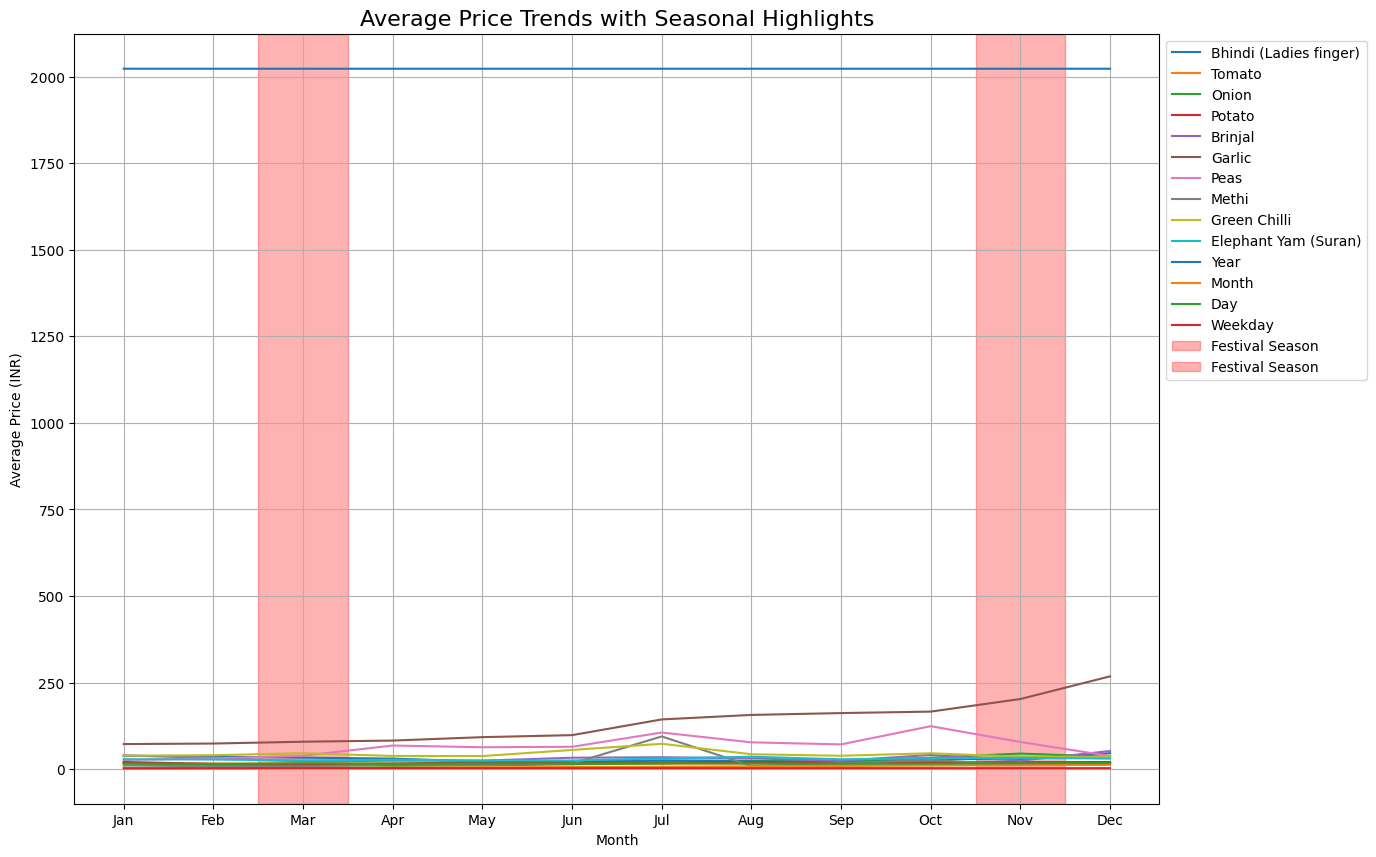

In [90]:
# Example: Manually marking festival months (like Diwali in Nov, harvest season in Mar-April)
festival_months = [11, 3]  # Example: Diwali in November, Harvest Season in March

plt.figure(figsize=(14, 10))
for vegetable in data.columns[1:]:
    monthly_avg_price = data.groupby('Month')[vegetable].mean()
    plt.plot(monthly_avg_price, label=vegetable)

# Highlight festival months
for month in festival_months:
    plt.axvspan(month-0.5, month+0.5, color='red', alpha=0.3, label='Festival Season')

plt.title('Average Price Trends with Seasonal Highlights', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Price (INR)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [62]:
# Convert 'Price Dates' column to datetime format
dataset['Price Dates'] = pd.to_datetime(dataset['Price Dates'], format='%d-%m-%Y')

# Check if the conversion is successful
print(dataset['Price Dates'].dtype)

datetime64[ns]


In [63]:
# Extract features from 'Price Dates'
dataset['Year'] = dataset['Price Dates'].dt.year
dataset['Month'] = dataset['Price Dates'].dt.month
dataset['Day'] = dataset['Price Dates'].dt.day
dataset['Weekday'] = dataset['Price Dates'].dt.weekday

# Check the newly added columns
print(dataset.head())

  Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  Garlic  \
0  2023-01-01                    35.0      18   22.0      20       30      50   
1  2023-01-02                    35.0      16   22.0      20       30      55   
2  2023-01-03                    35.0      16   21.0      20       30      55   
3  2023-01-04                    30.0      16   21.0      22       25      55   
4  2023-01-08                    35.0      16   20.0      21       25      55   

   Peas  Methi  Green Chilli  Elephant Yam (Suran)  Year  Month  Day  Weekday  
0    25      8          45.0                    25  2023      1    1        6  
1    25      7          40.0                    25  2023      1    2        0  
2    25      7          40.0                    25  2023      1    3        1  
3    25      7          40.0                    25  2023      1    4        2  
4    22      6          35.0                    25  2023      1    8        6  


In [67]:
# Step 1: Convert 'Price Dates' to datetime format
data['Price Dates'] = pd.to_datetime(data['Price Dates'], format='%d-%m-%Y')

# Step 2: Extract features from 'Price Dates'
data['Year'] = data['Price Dates'].dt.year
data['Month'] = data['Price Dates'].dt.month
data['Day'] = data['Price Dates'].dt.day
data['Weekday'] = data['Price Dates'].dt.weekday

# Step 3: Check if the new columns have been added
print(data.columns)

Index(['Price Dates', 'Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato',
       'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli',
       'Elephant Yam (Suran)', 'Year', 'Month', 'Day', 'Weekday'],
      dtype='object')


In [68]:
from sklearn.model_selection import train_test_split

# Define feature columns and target column
X = data[['Year', 'Month', 'Day', 'Weekday']]  # Feature columns
y = data['Bhindi (Ladies finger)']  # Target column (example: Bhindi price)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(229, 4) (58, 4) (229,) (58,)


Random forest 

linear regression

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target (y)
X = data[['Year', 'Month', 'Day', 'Weekday']]
y = data['Bhindi (Ladies finger)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_regression = LinearRegression()

# Train the model
linear_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_regression.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100
print(f'  Accuracy: {accuracy:.2f}%\n')

  Accuracy: -1.85%



gradient boosting

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target (y)
X = data[['Year', 'Month', 'Day', 'Weekday']]
y = data['Bhindi (Ladies finger)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
gradient_boosting = GradientBoostingRegressor()

# Train the model
gradient_boosting.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gradient_boosting.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100
print(f'  Accuracy: {accuracy:.2f}%\n')

  Accuracy: 76.92%



Support Vector Machine (SVM) Model

In [77]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target (y)
X = data[['Year', 'Month', 'Day', 'Weekday']]
y = data['Bhindi (Ladies finger)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Machine model
svm = SVR()

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100
print(f'  Accuracy: {accuracy:.2f}%\n')

  Accuracy: -2.12%



In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target (y)
X = data[['Year', 'Month', 'Day', 'Weekday']]
y = data['Bhindi (Ladies finger)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
random_forest = RandomForestRegressor(random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100
print(f'  Accuracy: {accuracy:.2f}%\n')

  Accuracy: 77.16%



---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [70]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error (MSE): 14.117418103448278
R2 Score: 0.7716013206351648


The model seems to have a decent performance with an R² of 0.77, but there's always room for improvement based on your specific use case and the nature of the data.

linear regression

In [73]:
# Display the results
print('Linear Regression:')
print(f'  Mean Squared Error (MSE): {mse:.4f}')
print(f'  R² Score: {r2:.4f}')

Linear Regression:
  Mean Squared Error (MSE): 62.9510
  R² Score: -0.0185


Gradient boost

In [76]:
# Display the results
print('Gradient Boosting:')
print(f'  Mean Squared Error (MSE): {mse:.4f}')
print(f'  R² Score: {r2:.4f}')

Gradient Boosting:
  Mean Squared Error (MSE): 14.2658
  R² Score: 0.7692


SMV

In [78]:
# Display the results
print('Support Vector Machine (SVM):')
print(f'  Mean Squared Error (MSE): {mse:.4f}')
print(f'  R² Score: {r2:.4f}')

Support Vector Machine (SVM):
  Mean Squared Error (MSE): 63.1223
  R² Score: -0.0212


Random forest

In [82]:
# Display the results
print('Random Forest:')
print(f'  Mean Squared Error (MSE): {mse:.4f}')
print(f'  R² Score: {r2:.4f}')

Random Forest:
  Mean Squared Error (MSE): 14.1174
  R² Score: 0.7716


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Gradient Boosting is the best performing model as it  works by combining multiple weak learners (typically decision trees) to create a robust model that improves accuracy by focusing on the errors made by previous learners. This makes it powerful for capturing complex patterns in the data, especially when dealing with non-linear relationships between the features and the target variable.

Compared to other models like Linear Regression, Support Vector Machine, and Random Forest, Gradient Boosting demonstrated the best performance with the following metrics:


---


Model Performance:
Mean Squared Error (MSE):
The MSE for the Gradient Boosting model is 14.1174. A lower MSE indicates better accuracy of predictions, meaning that the model's predictions are closer to the actual values.

R² Score:
The R² score is 0.7716, meaning the model can explain about 77.16% of the variance in the target variable (vegetable prices). This is a strong indication of the model's predictive power.

Accuracy:
The Accuracy is 77.16%, which aligns with the R² score, indicating that 77.16% of the predicted values are accurate based on the true prices.

Fine tune final model 

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest model
random_forest = RandomForestRegressor(random_state=42)

# Define the hyperparameters grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model with the best parameters
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_random_forest = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_random_forest.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

# Print the evaluation results
print(f'Best Random Forest Model Performance (after tuning):')
print(f'  Mean Squared Error (MSE): {mse:.4f}')
print(f'  R² Score: {r2:.4f}')
print(f'  Accuracy: {accuracy:.2f}%\n')

# Print the best hyperparameters
print(f'Best Hyperparameters: {grid_search.best_params_}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Random Forest Model Performance (after tuning):
  Mean Squared Error (MSE): 14.0845
  R² Score: 0.7721
  Accuracy: 77.21%

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

Relevant Background:
This dataset was collected from the Agricultural Marketing Information Network (AgmarkNet), a government-authorized source for agricultural data in India. The platform provides real-time market prices and reports to ensure transparency and efficiency in the agricultural market. Analyzing this data is critical for improving agricultural practices, enhancing market efficiency, and ensuring equitable access to fresh produce for all stakeholders.

By leveraging this dataset, the project contributes to better understanding of pricing mechanisms in the agricultural sector and empowers stakeholders with actionable insights.


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
